# INFORME PRUEBA INDIVIDUAL 2

### PRESENTADO POR: YEINER ALEXANDER IMBACHI GOMEZ 

##### COVID19

In [1]:
pip install sodapy


[notice] A new release of pip available: 22.1.2 -> 22.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


importe de librerías necesarias

In [1]:
# importe de librerias
#import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from  datetime import datetime
import heapq
from sklearn.linear_model import LinearRegression

from sodapy import Socrata

# OBTENCION DE DATOS

In [419]:
# Creación del cliente socrata
client = Socrata('healthdata.gov',
                  '8pSgQnWGvY8aeMI5VXoN3EIAH',
                  "yeialeximbachi@gmail.com",
                  "riocauca(97)")

# obtencion de datos
results = client.get_all("g62h-syeh")

# convertir los datos a tipo DATAFRAME
results_df = pd.DataFrame.from_records(results)

se crea una copia de la base de datos original

In [425]:
df = results_df.sort_values(by='date',ascending=True)

#### 1 - ¿Cuáles fueron los 5 Estados con mayor ocupación hospitalaria por COVID? Criterio de ocupación por cama común. Considere la cantidad de camas ocupadas con pacientes confirmados y tome como referencia los 6 primeros meses del 2020 - recuerde incluir la cifra de infectados en esos meses (acumulativo). ¿Influye el rango etario en este comportamiento?

obtención de las columnas necesarias

In [442]:

df2 = pd.DataFrame()

# obtención de columnas necesarias

# estados
df2['estado'] = results_df[['state']]
# fechas
df2['fecha'] = results_df[['date']]
# total de camas para cada estado
df2['totalCamas'] = results_df[['inpatient_beds']]

#15. Reported patients currently hospitalized in an inpatient bed who have suspected or confirmed COVID-19 in this state
df2['infectadosCovid'] = results_df[['inpatient_beds_used_covid']]

cambio del tipo de datos de cada columna

In [444]:
# cambiar tipo de dato
df2['fecha']= pd.to_datetime(df2['fecha'],format="%Y-%m-%d")
df2['totalCamas'] =  pd.to_numeric(df2['totalCamas'] , downcast='integer')
df2['infectadosCovid'] = pd.to_numeric(df2['infectadosCovid'] , downcast='integer')
df2 = df2.fillna(0)

crear el filtro para los primeros 6 meses del año 2020

Top 5 de los paises de mayor ocupación en la primera mitad del 2020


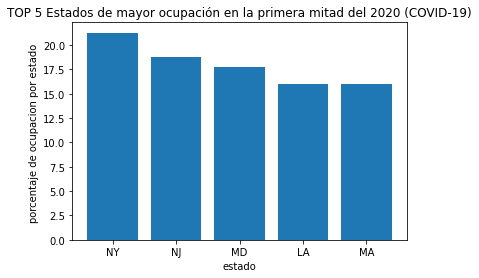

In [445]:
filtro = df2['fecha'] < pd.to_datetime('2020-07-01')
df3 = df2[filtro]
df3 = df3.sort_values(by='fecha',ascending=True)
df3 = df3[['estado','totalCamas','infectadosCovid']]
df3 = df3.groupby(['estado'],as_index=False).sum()
df3['porcentaje'] = (df3['infectadosCovid']/df3['totalCamas'])*100
df3 = df3.sort_values(by='porcentaje',ascending=False)
df3 = df3.head()


print('Top 5 de los paises de mayor ocupación en la primera mitad del 2020')


# graficar e top 5 
plt.bar(df3['estado'], df3['porcentaje'])
 
## Legenda en el eje y
plt.ylabel('porcentaje de ocupacion por estado ')
 
## Legenda en el eje x
plt.xlabel('estado')
 
## Título de Gráfica
plt.title('TOP 5 Estados de mayor ocupación en la primera mitad del 2020 (COVID-19)')
 
## Mostramos Gráfica
plt.show()



In [446]:
df3.head()

,estado,totalCamas,infectadosCovid,porcentaje
34,NY,3229338.0,686528.0,21.259094
31,NJ,1005128.0,188728.0,18.776514
20,MD,673243.0,119301.0,17.720348
18,LA,730680.0,116724.0,15.974708
19,MA,1216917.0,194018.0,15.943405


Con lo anterior se puede observar que el top 5 de los paises de mayor ocupación de camas,de las personas infectadas por COVID19 que han sido infectados por covid 19 en la primera mitad del 2020, se conforma por: <br>
1. New York
2. New Jersey
3. Maryland
4. Loussiana
5. Massachusetts

# 2 - Analice la ocupación de camas (Común) por COVID en el Estado de Nueva York durante la cuarentena establecida e indique:

Intervalos de crecimiento y decrecimiento
Puntos críticos (mínimos y máximos)

In [450]:
fechaIni = '2020-03-21'
fechaFin = '2021-05-15'
filtro = (df2['estado'] == 'NY')
filtro2 = df2['fecha'] >= pd.to_datetime(fechaIni)
filtro3 = df2['fecha'] <= pd.to_datetime(fechaFin) 
df4 = df2[filtro]
df4 = df4[filtro2]
df4 = df4[filtro3]
df4 = df4.sort_values(by='fecha',ascending=True)
df4.reset_index(inplace=True)

C:\Users\ALEX\AppData\Local\Temp\ipykernel_10060\1181888078.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df4 = df4[filtro2]
C:\Users\ALEX\AppData\Local\Temp\ipykernel_10060\1181888078.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df4 = df4[filtro3]


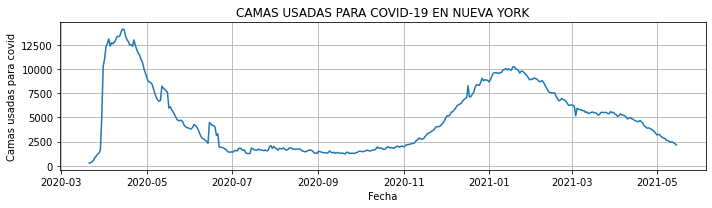

In [452]:
plt.figure(figsize=(10,3))
plt.plot(df4['fecha'],df4['infectadosCovid'])
plt.title('CAMAS USADAS PARA COVID-19 EN NUEVA YORK')
plt.xlabel('Fecha')
plt.ylabel('Camas usadas para covid')
plt.tight_layout()
plt.grid()
plt.show()

In [455]:
ocupacionMax = df4['infectadosCovid'].max()
fechaMax = df4['infectadosCovid'].idxmax()
print('En le fecha ',df4['fecha'][fechaMax],'se obtuvo el máximo de ocupación de camas COVID, con un total de ',ocupacionMax,' camas usadas')

ocupacionMin = df4['infectadosCovid'].min()
fechaMin = df4['infectadosCovid'].idxmin()
print('En le fecha ',df4['fecha'][fechaMin],'se obtuvo el mínimo de ocupación de camas COVID, con un total de ',ocupacionMin,' camas usadas')

En le fecha  2020-04-14 00:00:00 se obtuvo el máximo de ocupación de camas COVID, con un total de  14126.0  camas usadas
En le fecha  2020-03-21 00:00:00 se obtuvo el mínimo de ocupación de camas COVID, con un total de  279.0  camas usadas


En la gráfica anterior puede observarse, que a finales de marzo del 2020, la curva de camas usadas para COVID19 crece rápidamente desde un mínimo de 279 camas (inicio de la cuarentena), hasta alcanzar un valor máximo de 14126 camas para el 14 de abrir del mismo año. Posteriormente, disminuye hasta alcanzar un valor estable de 1800 camas aproximadamente hasta el mes de noviembre.  Para los meses de noviembre 2022 hasta fines de enero de 2021, presenta un segundo pico con un valor de 10000 camas, para luego decaer a 2500 camas para el mes de mayo de 2021.  

## 3 - ¿Cuáles fueron los cinco Estados que más camas UCI -Unidades de Cuidados Intensivos- utilizaron durante el año 2020? La medición debe realizarse en términos absolutos.

obtención de datos

In [456]:
df5 = pd.DataFrame()
# total de adultos con camas en uci
df5['adultosUCI'] = df['staffed_adult_icu_bed_occupancy']

# total de adulto con camas en uci, y camas desocupadas
#df5['ediatraUCI'] = df['total_staffed_adult_icu_beds']

# paciente de peditatría con cama en UCI ocupadas
df5['pediatraUCI'] = df['staffed_pediatric_icu_bed_occupancy']
df5['fecha'] = df['date']
df5['estado'] = df['state']

cambiar tipo de datos

In [457]:
# cambiar tipo de dato
df5['fecha']= pd.to_datetime(df5['fecha'],format="%Y-%m-%d")
df5['adultosUCI'] =  pd.to_numeric(df5['adultosUCI'] , downcast='integer')
df5['pediatraUCI'] = pd.to_numeric(df5['pediatraUCI'] , downcast='integer')
df5['anio'] = df5['fecha'].dt.year


ordenamiento por fecha, y aplicar filtro de año 2020

In [458]:
df5 = df5.sort_values(by='fecha',ascending=True)
filtro = df5['anio'] == 2020
df5 = df5[filtro] 

In [459]:
df5 = df5.groupby(['estado'],as_index=False).sum()
df5['ocupacionUCI'] = df5['adultosUCI']+ df5['pediatraUCI']
df5 = df5.sort_values(by='ocupacionUCI',ascending=False)
df5 = df5.drop(columns=['anio'])
df5 =df5.head()
df5

,estado,adultosUCI,pediatraUCI,ocupacionUCI
4,CA,901684.0,221527.0,1123211.0
44,TX,991193.0,55836.0,1047029.0
9,FL,799387.0,96279.0,895666.0
34,NY,491616.0,137130.0,628746.0
38,PA,465537.0,102167.0,567704.0


graficar

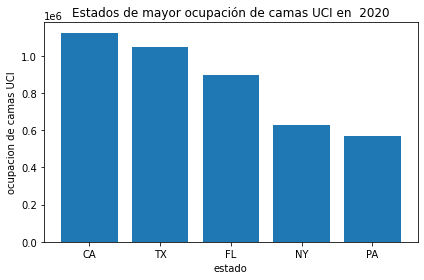

In [460]:

plt.bar(df5['estado'], df5['ocupacionUCI'])
## Legenda en el eje y
plt.ylabel('ocupacion de camas UCI')
## Legenda en el eje x
plt.xlabel('estado')
## Título de Gráfica
plt.title('Estados de mayor ocupación de camas UCI en  2020')
plt.tight_layout()
## Mostramos Gráfica
plt.show()

En las figuras anteriores se pueden observar los cinco estados que presentan mayor ocupación UCI en USA, teniendo en cuenta camas ocupadas por pacientes adultos y de pediatría. Por tanto, para el año 2020 se tiene lo siguiente:<br>
1. California
2. Texas
3. Florida
4. Nueva York
5. Pensilvania

# 4 - ¿Qué cantidad de camas se utilizaron, por Estado, para pacientes pediátricos con COVID durante el 2020?

obtención de datos

C:\Users\ALEX\AppData\Local\Temp\ipykernel_10060\1510744105.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['fecha'] = df['date']
C:\Users\ALEX\AppData\Local\Temp\ipykernel_10060\1510744105.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['estado'] = df['state']
C:\Users\ALEX\AppData\Local\Temp\ipykernel_10060\1510744105.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

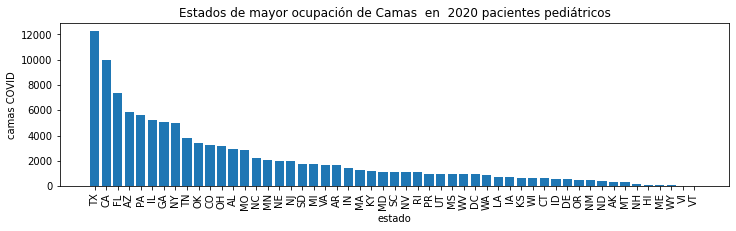

In [93]:
df6 = df[['total_pediatric_patients_hospitalized_confirmed_covid']]
df6['fecha'] = df['date']
df6['estado'] = df['state']

# cambiar tipo de dato
df6['fecha']= pd.to_datetime(df6['fecha'],format="%Y-%m-%d")
df6['total_pediatric_patients_hospitalized_confirmed_covid'] =  pd.to_numeric(df6['total_pediatric_patients_hospitalized_confirmed_covid'] , downcast='integer')
#df6['anio'] = df6['fecha'].dt.year

# ordenar por fecha
df6 = df6.sort_values(by='fecha',ascending=True)
# tomar en cuenta solo el año 2020
filtro = df6['fecha'].dt.year == 2020
df6 = df6[filtro]
# agrupacion por estado
df6 = df6.groupby(['estado'],as_index=False).sum()
df6 = df6.sort_values(by='total_pediatric_patients_hospitalized_confirmed_covid',ascending=False)
#df6 = df6.head()


# graficar
plt.figure(figsize=(12,3))
plt.bar(df6['estado'], df6['total_pediatric_patients_hospitalized_confirmed_covid'])
## Legenda en el eje y
plt.ylabel('camas COVID')
 
## Legenda en el eje x
plt.xlabel('estado')
 
## Título de Gráfica
plt.title('Estados de mayor ocupación de Camas  en  2020 pacientes pediátricos')
 
plt.xticks(rotation=90)
## Mostramos Gráfica
plt.show()

Aquí se tomaron los pacientes de pediatría que están hospitalizados y que han sido confirmado para COVID19, donde el estado de TEXAS presenta una mayor ocupación de camas pediátricas con cerca de 12000 para el año 2020. El estado en segunda posición es california, con 10000 camas aproximadamente. 

# 5 - ¿Qué porcentaje de camas UCI corresponden a casos confirmados de COVID-19? Agrupe por Estado.

Aquí se tienen en cuenta los pacientes (adultos y de pediatría) que se encuentran hospitalizados ocupando una cama en UCI, y también aquellos que han sido confirmados por covid(adultos y de pediatría) que se encuentran hospitalizados en UCI

In [478]:
# Obtención de datos
df7 = pd.DataFrame()

#fechas
df7['fecha'] = df['date']
#estados
df7['estado'] = df['state']
# total de adultos ocupando camas en uci
df7['adultosUCI'] = df['staffed_adult_icu_bed_occupancy']
# total de pacientes de pediatría ocupando camas en uci
df7['pediatraUCI'] = df['staffed_pediatric_icu_bed_occupancy']



#Adultos con covid que tienen cama en UCI, confirmados
df7['adultosUCIcovid'] = df['staffed_icu_adult_patients_confirmed_covid']

#pacientes pediatricos con covid confirmado, que tienen cama UCI
df7['pediatríaUCIcovid'] = df['staffed_icu_pediatric_patients_confirmed_covid']
#llenar campos vacios con cero
df7 = df7.fillna(0)

#cambio de tipo de datos
df7['fecha']= pd.to_datetime(df7['fecha'],format="%Y-%m-%d")
df7['adultosUCI'] =  pd.to_numeric(df7['adultosUCI'] , downcast='integer')
df7['pediatraUCI'] =  pd.to_numeric(df7['pediatraUCI'] , downcast='integer')
df7['adultosUCIcovid'] =  pd.to_numeric(df7['adultosUCIcovid'] , downcast='integer')
df7['pediatríaUCIcovid'] =  pd.to_numeric(df7['pediatríaUCIcovid'] , downcast='integer')

Se ordena por fecha y se agrupa teniendo en cuenta cada Estado. Posteriormente se suman los pacientes que se encuentran en UCI, y tambien aquellos que presentan COVID  hospitalizados en UCI, con el fin determinar la proporción

In [479]:
#ordenamiento por fehca
df7 = df7.sort_values(by='fecha',ascending=True)
#agrupacion por estado
df7 = df7.groupby(['estado'],as_index=False).sum()
# suma de pacientes en uci
df7['totalUci'] = df7['adultosUCI']+ df7['pediatraUCI']
# suma de paciente con covid en uci
df7['uciCovid'] = df7['adultosUCIcovid'] + df7['pediatríaUCIcovid']
# porcentaje de casos covid vs casos uci
df7['covidUci_uci'] = (df7['uciCovid']/df7['totalUci'])*100

# ordenamiento Descente
df7 = df7.sort_values(by='covidUci_uci',ascending=False)


graficar

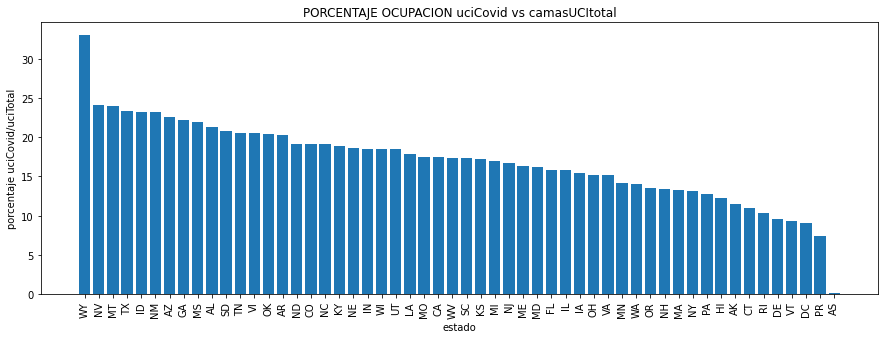

In [480]:
plt.figure(figsize=(15,5))
plt.bar(df7['estado'],df7['covidUci_uci'],label='uciTotal')
## Legenda en el eje y
plt.ylabel('porcentaje uciCovid/uciTotal')
## Legenda en el eje x
plt.xlabel('estado')
## Título de Gráfica
plt.title('PORCENTAJE OCUPACION uciCovid vs camasUCItotal')
plt.xticks(rotation=90)
## Mostramos Gráfica
plt.show()

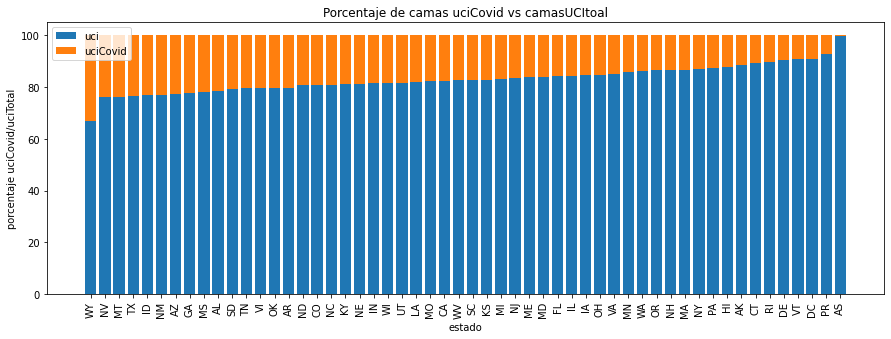

In [481]:
# graficar


plt.figure(figsize=(15,5))

plt.bar(df7['estado'],100-df7['covidUci_uci'],label='uci')
plt.bar(df7['estado'], df7['covidUci_uci'], bottom=100-df7['covidUci_uci'],label='uciCovid')
## Legenda en el eje y
plt.ylabel('porcentaje uciCovid/uciTotal')
 
## Legenda en el eje x
plt.xlabel('estado')
 
## Título de Gráfica
plt.title('Porcentaje de camas uciCovid vs camasUCItoal')
plt.legend()
plt.xticks(rotation=90)
## Mostramos Gráfica
plt.show()

En la figura anterior, se puede observar que el país con mayor presencia de CASOS COVID presentes en la unidad UCI es Wyoming, con un 30% de partipación COVID. 

# 6 - ¿Cuántas muertes por covid hubo, por Estado, durante el año 2021?

A continuacion se muestran las muertes COVID19  por estado

In [492]:
# Obtención de datos
df8 = pd.DataFrame()

#fechas
df8['fecha'] = df['date']
#estados
df8['estado'] = df['state']
# muertes por covid
df8['muertesCovid'] = df['deaths_covid']


#llenar campos vacios con cero
#df7 = df7.fillna(0)

#cambio de tipo de datos
df8['fecha']= pd.to_datetime(df8['fecha'],format="%Y-%m-%d")
df8['muertesCovid'] =  pd.to_numeric(df8['muertesCovid'] , downcast='integer')

#filtro
filtro = df8['fecha'].dt.year == 2021
df8 = df8[filtro]
#agrupación por estado
df8 = df8.groupby(['estado'],as_index=False).sum()
# ordenar Descendentemente por muertes
df8 = df8.sort_values(by='muertesCovid',ascending=False)

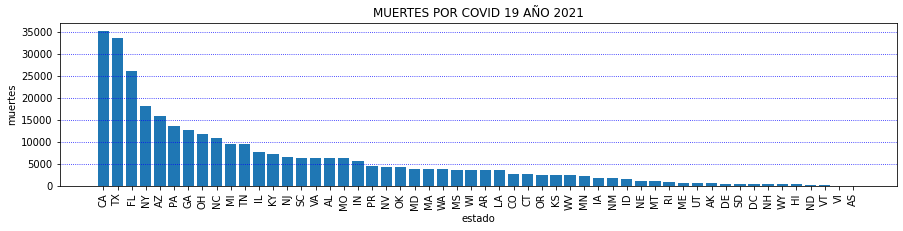

In [491]:
plt.figure(figsize=(15,3))
plt.bar(df8['estado'],df8['muertesCovid'])
plt.ylabel('muertes')
## Legenda en el eje x
plt.xlabel('estado')
 
## Título de Gráfica
plt.title('MUERTES POR COVID 19 AÑO 2021')
 
plt.xticks(rotation=90)
plt.grid(axis='y',linestyle='dotted', color='b')
## Mostramos Gráfica
plt.show()


California es el estado que mayor mortalidad presentó en el año 2021, con número de 35272 fallecidos.

# 7 - ¿Qué relación presenta la falta de personal médico, con la cantidad de muertes por covid durante el año 2021?

Para ello se analizan las muertes frente al numero de hospitales que reportan tener escasez crítica de personal médico

In [493]:
# Obtención de datos
df9 = pd.DataFrame()

#fechas
df9['fecha'] = df['date']
#estados
df9['estado'] = df['state']
# muertes por covid
df9['muertesCovid'] = df['deaths_covid']
# escasez de personal medico
df9['escasezMed'] = df['critical_staffing_shortage_today_yes']



#cambio de tipo de datos
df9['fecha']= pd.to_datetime(df9['fecha'],format="%Y-%m-%d")
df9['muertesCovid'] =  pd.to_numeric(df9['muertesCovid'] , downcast='integer')
df9['escasezMed'] =  pd.to_numeric(df9['escasezMed'] , downcast='integer')
#filtro
filtro = df9['fecha'].dt.year == 2021
df9 = df9[filtro]
# ordenar por fecha
df9 = df9.sort_values(by='fecha',ascending=True)
#agrupación por fecha
df9 = df9.groupby(['fecha'],as_index=False).sum()

graficar

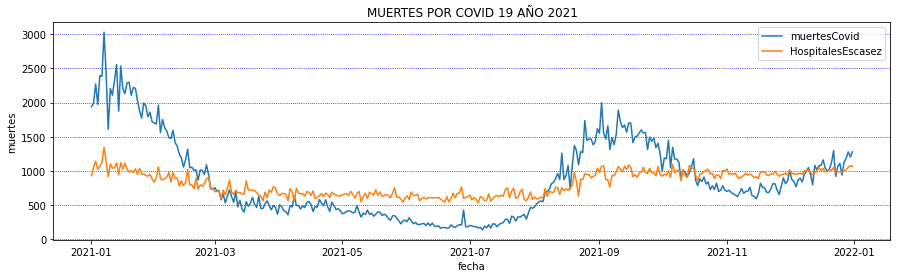

In [494]:

plt.figure(figsize=(15,4))
plt.plot(df9['fecha'],df9['muertesCovid'],label='muertesCovid')
plt.plot(df9['fecha'],df9['escasezMed'],label='HospitalesEscasez')
plt.ylabel('muertes')
## Legenda en el eje x
plt.xlabel('fecha')
 
## Título de Gráfica
plt.title('MUERTES POR COVID 19 AÑO 2021')
 
#plt.xticks(rotation=90)
plt.grid(axis='y',linestyle='dotted', color='b')
## Mostramos Gráfica
plt.legend()

plt.show()

De acuerdo a la figura anterior, al inicio del año 2021 existe un aumento importante en la escasez de personal médico, que va de la mano con un  pico de muertes por covid, con aproximadamente 3000 fallecidos. Posteriormente, en agosto de 2021,  nuevamente se ve un incremento en la falta de personal médico, lo que provoca un pico de 2000 muertes para el mes de septiembre.  Por tanto se puede decir que las dos variables presentan gran relación, dado que un breve aumento en la falta de recurso médico provoca un incremento significativo de muertes por COVID.

# 8 - Siguiendo las respuestas anteriores, ¿cuál fue el peor mes de la pandemia para USA en su conjunto? Puede utilizar otras medidas que considere necesarias.

Para determinar el peor mes  de la pandemia en USA, en este caso, se tuvo en cuenta 2 factores importantes como: <br>

1. El porcentaje de ocupación de uciCOVID frente al camas UCI. Con ello se puede determinar durante qué mes aumentan los casos covid frente la capacidad de la uci. <br>

2. Muertes por Covid. Para analizar los meses de mayor mortalidad <br>

3. Escacez médica. Para mirar la relación mes a mes de la escacez con las muertes por covid. 

Determinar el porcentaje de ocupacion uci por covid

In [526]:
# Obtención de datos
df10 = pd.DataFrame()

#fechas
df10['fecha'] = df['date']

#estados
df10['estado'] = df['state']
# total de adultos con camas en uci
df10['adultosUCI'] = df['staffed_adult_icu_bed_occupancy']
# total de pacientes en pediatría ocupando camas en uci
df10['pediatraUCI'] = df['staffed_pediatric_icu_bed_occupancy']

#Adultos con covid confirmado  que tienen cama en UCI
df10['adultosUCIcovid'] = df['staffed_icu_adult_patients_confirmed_covid']

#pacientes pediatricos con covid confirmado, que tienen cama UCI
df10['pediatríaUCIcovid'] = df['staffed_icu_pediatric_patients_confirmed_covid']

#cambio de tipo de datos
df10['fecha']= pd.to_datetime(df10['fecha'],format="%Y-%m-%d")
#agregar columna de años
df['anio'] = df10['fecha'].dt.year
# agregar columna de mes
df10['mes'] = df10['fecha'].dt.month
#cambiar tipos de datos
df10['adultosUCI'] =  pd.to_numeric(df10['adultosUCI'] , downcast='integer')
df10['pediatraUCI'] =  pd.to_numeric(df10['pediatraUCI'] , downcast='integer')
df10['adultosUCIcovid'] =  pd.to_numeric(df10['adultosUCIcovid'] , downcast='integer')
df10['pediatríaUCIcovid'] =  pd.to_numeric(df10['pediatríaUCIcovid'] , downcast='integer')
# columna resumen que contiene el año y el mes
df10['AnioMes'] = 0
for ind, elem in enumerate(df10['fecha']):
    df10['AnioMes'][ind] = str(df10['fecha'][ind].year)+ "- "+str(df10['fecha'][ind].month)


C:\Users\ALEX\AppData\Local\Temp\ipykernel_10060\3567141357.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df10['AnioMes'][ind] = str(df10['fecha'][ind].year)+ "- "+str(df10['fecha'][ind].month)


Determinar las muertes por covid y escasez de personal médico

In [527]:
# muertes por covid
df10['muertesCovid'] = df['deaths_covid']
# escasez de personal medico
df10['escasezMed'] = df['critical_staffing_shortage_today_yes']

#cambio de tipo de datos
df10['muertesCovid'] =  pd.to_numeric(df10['muertesCovid'] , downcast='integer')
df10['escasezMed'] =  pd.to_numeric(df10['escasezMed'] , downcast='integer')



In [528]:
#llenar campos vacios con cero
df10 = df10.fillna(0)
#ordenar por fecha
df10 =df10.sort_values(by='fecha',ascending=True)


Para determinar el porcentaje de uciCovid, se analizan los meses de cada año

In [530]:

# filtro para el 2020
f1 = df10['fecha'].dt.year == 2020
#filtro para el 2021
f2 = df10['fecha'].dt.year == 2021
# filtro para el 2022
f3 = df10['fecha'].dt.year == 2022

# porcentaje de participacion uciCovid para el año 2020
anio1 = df10[f1]
anio1 = anio1.groupby(['mes'],as_index=False).sum()
totalUci1 = anio1['adultosUCI']+ anio1['pediatraUCI']
totalUciCovid1 = anio1['adultosUCIcovid'] + anio1['pediatríaUCIcovid']
anio1['porcOcupacion'] = (totalUciCovid1/totalUci1)*100
anio1 = anio1.sort_values(by='mes',ascending=True)
anio1['AnioMes'] = 0
for ind, elem in enumerate(anio1['mes']):
    anio1['AnioMes'][ind] = '2020' + "-"+str(elem)



# porcentaje de participacion uciCovid para el año 2021
anio2 = df10[f2]
anio2 = anio2.groupby(['mes'],as_index=False).sum()
totalUci2 = anio2['adultosUCI']+ anio2['pediatraUCI']
totalUciCovid2 = anio2['adultosUCIcovid'] + anio2['pediatríaUCIcovid']
anio2['porcOcupacion'] = (totalUciCovid2/totalUci2)*100
anio2 = anio2.sort_values(by='mes',ascending=True)
anio2['AnioMes'] = 0
for ind, elem in enumerate(anio2['mes']):
    anio2['AnioMes'][ind] = '2021' + "-"+str(elem)

# porcentaje de participacion uciCovid para el año 2022
anio3 = df10[f3]
anio3 = anio3.groupby(['mes'],as_index=False).sum()
totalUci3 = anio3['adultosUCI']+ anio3['pediatraUCI']
totalUciCovid3 = anio3['adultosUCIcovid'] + anio3['pediatríaUCIcovid']
anio3['porcOcupacion'] = (totalUciCovid3/totalUci3)*100
anio3 = anio3.sort_values(by='mes',ascending=True)
anio3['AnioMes'] = 0
for ind, elem in enumerate(anio3['mes']):
    anio3['AnioMes'][ind] = '2022' + "-"+str(elem)


#unir los datos de los tres años
df10Aux = pd.concat([anio1,anio2,anio3],axis=0)
df10Aux = df10Aux.fillna(0)
maximos = heapq.nlargest(5,df10Aux['muertesCovid'])
maximos


C:\Users\ALEX\AppData\Local\Temp\ipykernel_10060\2901657637.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anio1['AnioMes'][ind] = '2020' + "-"+str(elem)
C:\Users\ALEX\AppData\Local\Temp\ipykernel_10060\2901657637.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anio2['AnioMes'][ind] = '2021' + "-"+str(elem)
C:\Users\ALEX\AppData\Local\Temp\ipykernel_10060\2901657637.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anio3[

[65754.0, 56567.0, 54473.0, 46216.0, 41837.0]

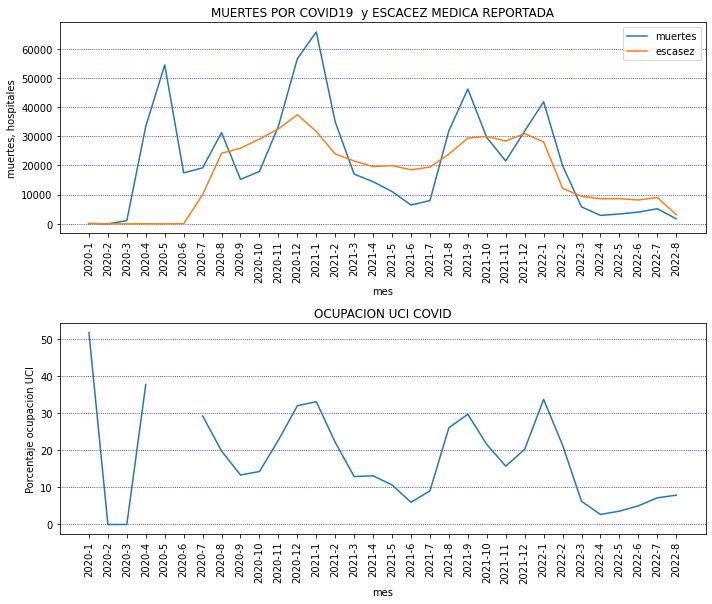

In [531]:

plt.figure(figsize=(10,8.5))
plt.subplot(2,1,1)
plt.title('MUERTES POR COVID19  y ESCACEZ MEDICA REPORTADA')
plt.plot(df10Aux['AnioMes'],df10Aux['muertesCovid'],label='muertes')
plt.plot(df10Aux['AnioMes'],df10Aux['escasezMed'],label='escasez')
plt.xlabel('mes')
plt.ylabel('muertes, hospitales')
plt.legend()
plt.xticks(rotation = 90)
plt.grid(axis='y',linestyle='dotted', color='b')


plt.subplot(2,1,2)
plt.title('OCUPACION UCI COVID')
plt.plot(df10Aux['AnioMes'],df10Aux['porcOcupacion'])
plt.ylabel('Porcentaje ocupación UCI')
plt.xlabel('mes')
plt.xticks(rotation = 90)
plt.grid(axis='y',linestyle='dotted', color='b')

 
plt.tight_layout()


plt.show()

con lo anterior se puede determinar que el peor mes de la pandemia en estados fue en enero de 2021, dado que es donde se presenta el mayor número de de muertes con aproximadamente 66000 fallecidos, y donde existen cerca de 38000 reportes de hospitales indicando aumento en la escasez de personal médico. Con una ocupación  de camas covid19 del 30% con respecto a las camas UCI.

# 9 - ¿Qué recomendaciones haría, ex post, con respecto a los recursos hospitalarios y su uso?

De acuerdo a lo analizado, se puede recomendar que habiliten más camas para atender a pacientes covid19, dado que se se tiene que el total de camas presentes por estado es mucho mayor a las destinadas solo a COVID.